In [1]:
import finalfig as ff
import numpy as np
import copy
import matplotlib.pyplot as plt
import tikzplotlib as tikz

import qsd_library_last as qsdl
import sdp

total_trials = 5
train_check = 10
d = np.array([2,2,2])
m = 3
q = np.array([1/3, 1/3, 1/3])
training_trials = 200

0.7.3


In [ ]:
vec_NN = []
vec_NN_err = []
vec_SDP = []

total_trials = 5 
training_trials = 200 
evaluation_trials = 5000 
check = 750
d = np.array([2,2,2])
m = 2
q = np.array([1/2, 1/2])


for j in range(total_trials):
    rho, _ = qsdl.generate_initial_state(d, m)
    vec_SDP.append(sdp.SDP(rho, q, len(d)))
    trialvec = []
    for _ in range(5):
        defaultconfig = {"rho": copy.copy(rho), "q": copy.copy(q),  
                 "quantization" : 20, "d" : d, "separable": True}
        trialvec.append(ff.single_test(defaultconfig, training_trials, evaluation_trials, check))
    vec_NN.append(np.mean(np.array([trialvec])))
    vec_NN_err.append(np.var(np.array([trialvec])))
    

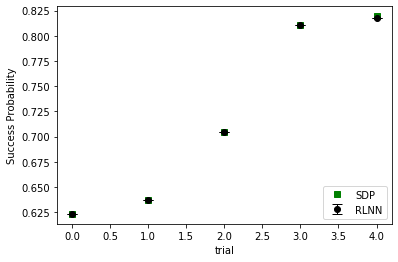

In [3]:
vec_SDP = np.array([vec_SDP]).flatten()
vec_NN = np.array([vec_NN]).flatten()
vec_NN_err = np.array([vec_NN_err]).flatten()

arrinds = vec_SDP.argsort()
sorted_SDP = vec_SDP[arrinds]
sorted_NN = vec_NN[arrinds]
sorted_NN_err = vec_NN_err[arrinds]

X = np.arange(total_trials)
plt.xlabel('trial')
plt.ylabel('Success Probability')
plt.errorbar(X, sorted_SDP, marker = "s", color = 'green', linewidth = 0, label = 'SDP')
plt.errorbar(X, sorted_NN, sorted_NN_err, elinewidth=1, capsize= 5.0,  color='black', marker = "o", linewidth=0, label = 'RLNN')
plt.legend(loc="lower right")
tikz.save("Fig7")
plt.show()